# **Author: Ahmad Baseer**

## **The Sparks Foundation Internship Task # 02**
---
## ***In this task From the given ‘Iris’ dataset, I have predict the optimum number of clusters using Elbow Method and represent it visually.***

### ***Step#01: Importing required libraries***

In [24]:
#Importing the important libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
import seaborn as sns
%matplotlib inline

### ***Step#02: Loading data***

In [25]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

### ***Step#03: Exploratory data analysis***

In [27]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [30]:
x.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [31]:
y.tail()

,Target
145,2
146,2
147,2
148,2
149,2


In [32]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [33]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### ***Step#04: Data visualization***



<Axes: >

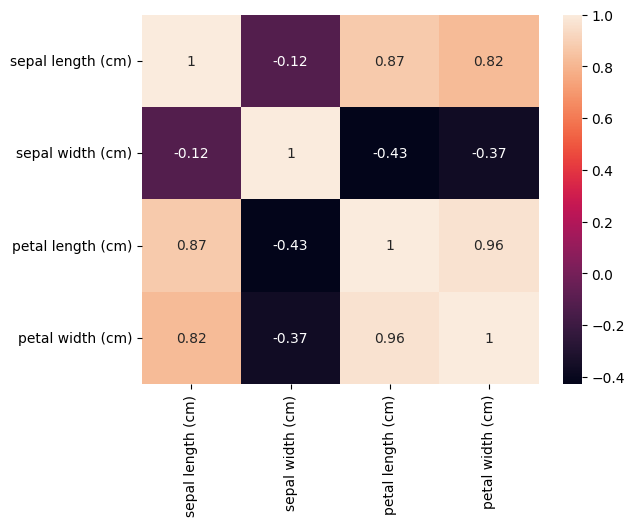

In [35]:
sns.heatmap(iris_df.corr(),annot=True)

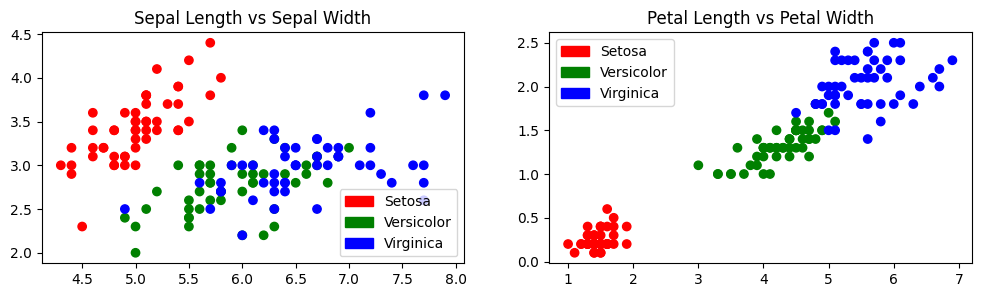

In [36]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

### ***Step#05: Finding optimum number of clusters***

---

#### **How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

Text(0, 0.5, 'Silhouette_Scores=')

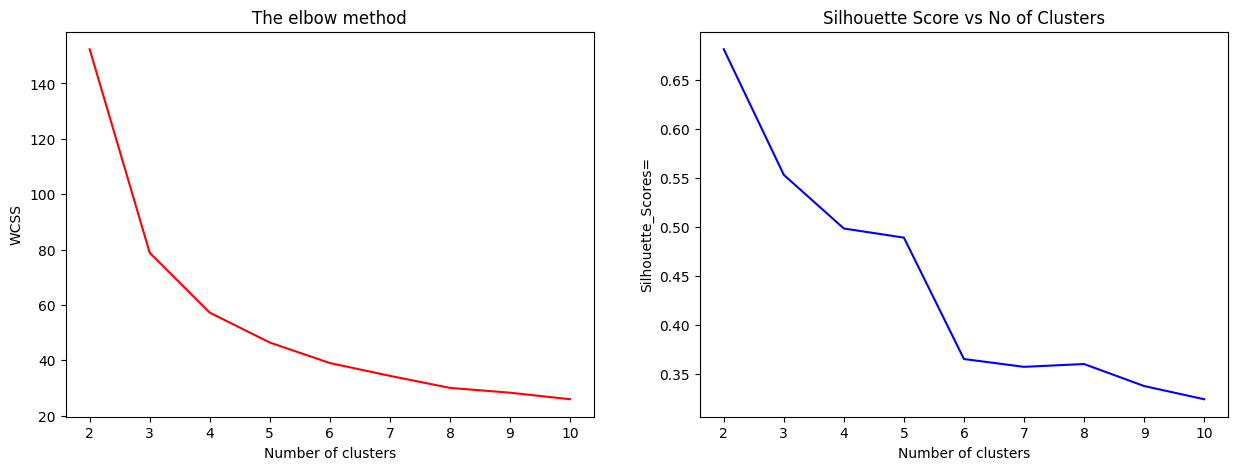

In [37]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []
silhouette_scores=[]

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss ,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares

# Plotting silhouette score(distance between clusters) to validate optimum clusters that can be chosen.
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores ,color='blue')
plt.title('Silhouette Score vs No of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Scores=')

### ***Step#06: Picikng the right value of K***

---

#### **Here we can clearly determine that k=3 using elbow method**

In [38]:
iris_k_mean_model = KMeans(n_clusters=3,random_state=0)
iris_k_mean_model.fit(x)

/home/ahmad/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [39]:
print(iris_k_mean_model.labels_,len(iris_k_mean_model.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] 150


In [40]:
print(iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### ***Step#07: Comparing the results***

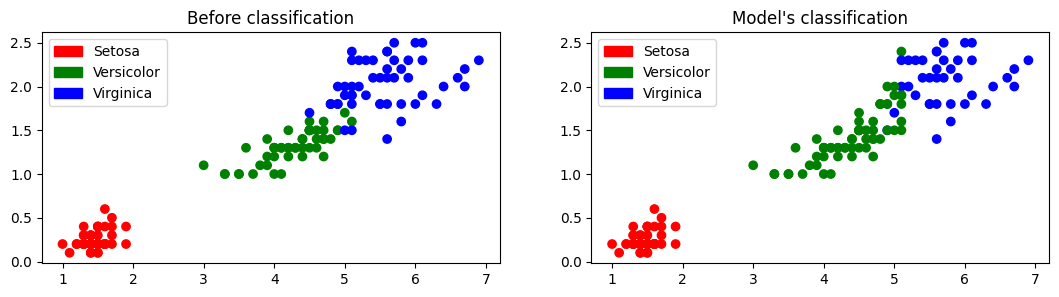

In [41]:
plt.figure(figsize=(13,3))

colors = np.array(['red', 'green', 'blue'])

y_pred = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)     #Will return index:0 for label:1, index:1 for label:0, and index:2 for label:2. So that, we can pick respective colors for the iris dataset classes.

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y_pred])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

### ***Step#07: Evaluating Accuracy of Model***

In [42]:
acc=sm.accuracy_score(y_pred, y['Target'])
acc

0.8933333333333333

In [43]:
sm.confusion_matrix(y_pred, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

In [44]:
classes=['versicolor', 'setosa' , 'virginica']

def predict_class_way1(new_data_point):
    # Calculate the Euclidean distances between the new data point and each of the training data points.
    distances = np.linalg.norm(x - new_data_point, axis=1)
    # print(distances,len(distances),np.argmin(distances))

    # The data point with the minimum Euclidean distance is the class of the new data point.
    class_label = classes[iris_k_mean_model.labels_[np.argmin(distances)]]

    return class_label,acc

predict_class_way1([5.1,3.5,1.4, 0.2])

('setosa', 0.8933333333333333)

In [45]:
def predict_class_way2(new_data_point):
    # Calculate the distances between the new data point and each of the cluster centers.
    distances = np.linalg.norm(iris_k_mean_model.cluster_centers_ - new_data_point, axis=1)
    # print(distances,len(distances),np.argmin(distances))

    # The data point with the minimum Euclidean distance is the class of the new data point.
    class_label = classes[np.argmin(distances)]

    return class_label, acc

predict_class_way2([5.1,3.5,1.4, 0.2])

('setosa', 0.8933333333333333)

In [47]:
import pickle
pickle.dump(iris_k_mean_model,open('model.sav','wb'))